# Funciones de Activación

Implementación y gráfica de algunas funciones de activación y sus derivadas.

La implementación se realiza directamente con _NumPy_, lo que hoy en día no es práctico ni necesario, pero resulta útil para afianzar conceptos.

## 1. Setup

Para ejecutar este _notebook_ en local se requiere Python, y se recomienda crear un entorno virtual para instalar las dependencias de manera controlada.

```
uv venv --python=python3.12
source .venv/bin/activate

uv pip install numpy==2.2.0
uv pip install matplotlib==3.10.0

uv pip install jupyterlab ipywidgets
uv run jupyter lab
```

## 2. Utilidades de Dibujado

Funciones utilizadas para dibujar las gráficas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def draw_chart(title, axis):
    plt.title(title)
    plt.axis(axis)
    plt.grid(True)
    plt.axhline(0, color="bisque")
    plt.axvline(0, color="bisque") 

def draw_series(series, xs):
    for data in series:
      plt.plot(xs, np.vectorize(data["fn"])(xs), color=data.get("color"), label=data.get("label"))
      
      if "label" in data:
          plt.legend(loc="upper left")

def draw_charts(f, f_prime, axis, title_f="f(x)", title_f_prime="f'(x)"):
    xs = np.linspace(axis[0], axis[1], 1000)
    
    plt.subplot(2, 2, 1)
    draw_chart(title_f, axis)
    draw_series(f if isinstance(f, list) else [{"fn": f, "color": "blue"}], xs)
    
    plt.subplot(2, 2, 2)
    draw_chart(title_f_prime, axis)
    draw_series(f_prime if isinstance(f_prime, list) else [{"fn": f_prime, "color": "green"}], xs)
    
    plt.tight_layout()

## 3. Funciones de Activación

### 3.1. Identity

Mantiene la entrada sin cambios, resultando en una salida igual a la entrada.

- $ f(x) = x $

- $ f'(x) = 1 $

Utilizada principalmente en la capa de salida para tareas de regresión donde se predice un valor continuo. No utilizada habitualmente en capas ocultas porque no introduce no linealidad.

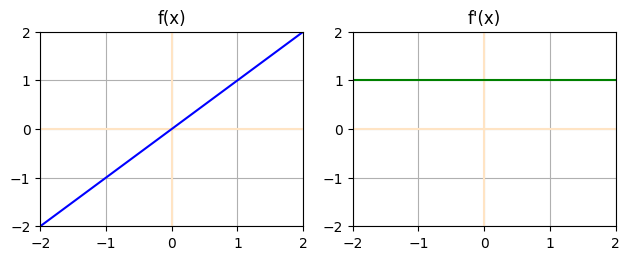

In [2]:
def draw_identity():
    f = lambda x : x
    f_prime = lambda x : 1.0
    
    draw_charts(f, f_prime, axis = [-2, 2, -2, 2])

draw_identity()

### 3.2. Binary Step

Produce una salida binaria ($0$ o $1$) dependiendo de si la entrada supera un umbral predefinido, que suele ser $0$ por defecto.

-  $ f(x) = \begin{cases} 1 & \quad \text{si } x \ge 0 \\ 0 & \quad \text{si } x < 0 \end{cases} $

-  $ f'(x) = 0 $

Raramente utilizada en redes neuronales modernas ya que su derivada es cero en la mitad del intervalo. Tiene más interés histórico o conceptual.

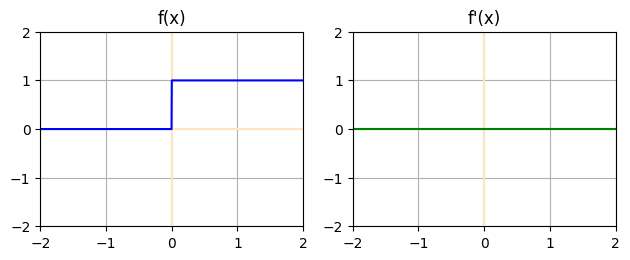

In [3]:
def draw_binary_step():
    f = lambda x : 1.0 if x >= 0.0 else 0.0
    f_prime = lambda x : 0.0
    
    draw_charts(f, f_prime, axis = [-2, 2, -2, 2])

draw_binary_step()

### 3.3. Sigmoid

Transforma los valores de entrada a un rango entre $0$ y $1$. Es una función suave con forma de "_S_".

- $ f(x) = \cfrac{1}{1 + e^{-x}} $

- $ f'(x) = f(x)(1 − f(x)) $

Utilizada habitualmente en la capa de salida para problemas de clasificación binaria. No utilizada habitualmente en capas ocultas ya que su rango de activación es muy pequeño, lo que  provoca problemas de desvanecimiento del gradiente.

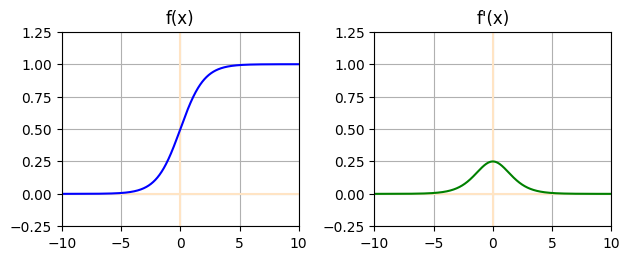

In [4]:
def draw_sigmoid():
    f = lambda x : 1.0 / (1.0 + np.exp(-x))
    f_prime = lambda x : f(x) * (1.0 - f(x))
    
    draw_charts(f, f_prime, axis = [-10, 10, -0.25, 1.25])
    
draw_sigmoid()

### 3.4. Hard Sigmoid

Aproximación lineal por tramos de la función _sigmoide_.

$ f(x) = \begin{cases} 1 & \quad \text{si } x \ge 3 \\ 0 & \quad \text{si } x \le -3 \\ \cfrac{x}{6} + \cfrac{1}{2} & \quad \text{en cualquier otro caso} \end{cases} $

$ f'(x) = \begin{cases} 0 & \quad \text{si } x \ge 3 \\ 0 & \quad \text{si } x \le -3 \\ \cfrac{1}{6} & \quad \text{en cualquier otro caso} \end{cases} $

Ofrece un comportamiento similar a la _sigmoide_ pero con un coste mucho menor. Utilizada en _hardware_ con recursos limitados o en redes neuronales binarias/cuantizadas.

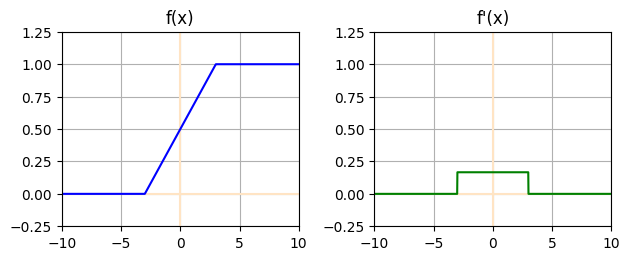

In [5]:
def draw_hard_sigmoid():
    f = lambda x : 1.0 if x >= 3.0 else 0.0 if x <= -3.0 else x/6.0 + 0.5
    f_prime = lambda x : 0.0 if x >= 3.0 else 0.0 if x <= -3.0 else 1.0/6.0

    draw_charts(f, f_prime, axis = [-10, 10, -0.25, 1.25])

draw_hard_sigmoid()

### 3.5. Tanh (Hyperbolic Tangent)

Similar a la _sigmoide_, pero transforma la entrada a un rango entre $-1$ y $1$.

- $ f(x) = \cfrac{e^x - e^{-x}}{e^{x} + e^{-x}} $

- $ f'(x) = 1 - f^2(x) $

Utilizada en capas ocultas en arquitecturas recurrentes, a menudo superando a la _sigmoide_ porque su salida centrada en cero puede ayudar a converger más rápido.

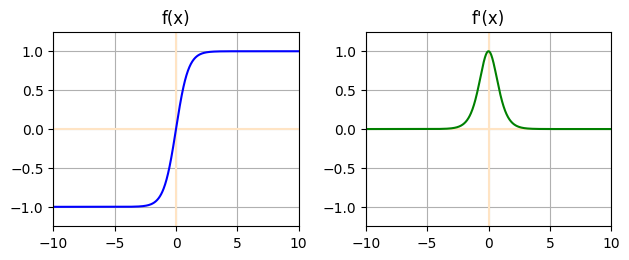

In [6]:
def draw_tanh():
    f = lambda x : (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    f_prime = lambda x : 1.0 - f(x)**2
    
    draw_charts(f, f_prime, axis = [-10, 10, -1.25, 1.25])

draw_tanh()

### 3.6 Hard Tanh

Aproximación lineal por tramos de la función _Tanh_.

- $ f(x) = \max(-1, \min(1, x)) $

- $ f'(x) = \begin{cases} 1 & \quad \text{si } -1 < x < 1 \\ 0 & \quad \text{en caso contrario} \end{cases} $

Ofrece un comportamiento similar a la _Tanh_ pero con un coste mucho menor. Utilizada en _hardware_ con recursos limitados o en redes neuronales binarias/cuantizadas.

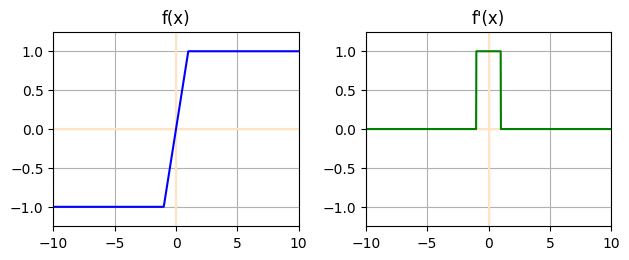

In [7]:
def draw_hard_tanh():
    f = lambda x : np.maximum(-1.0, np.minimum(1.0, x))
    f_prime = lambda x : 1.0 if x > -1.0 and x < 1.0 else 0.0
    
    draw_charts(f, f_prime, axis = [-10, 10, -1.25, 1.25])

draw_hard_tanh()

### 3.7. Softsign

Alternativa a _Tanh_ que se aproxima a la función signo de forma más suave.

- $ f(x) = \cfrac{x}{1 + |x|} $
  
- $ f'(x) = \cfrac{1}{(1 + |x|)^2} $

No es una de las funciones más populares hoy en día.

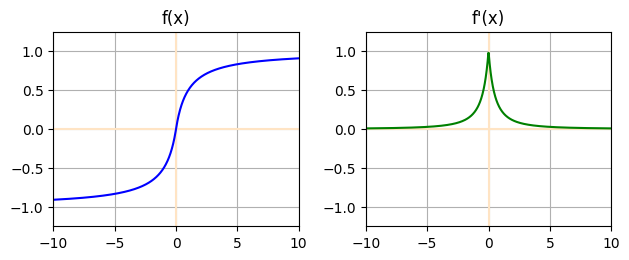

In [8]:
def draw_softsign():
    f = lambda x : x / (1.0 + np.abs(x))
    f_prime = lambda x : 1.0 / (1.0 + np.abs(x))**2

    draw_charts(f, f_prime, axis = [-10, 10, -1.25, 1.25])

draw_softsign()

### 3.8. ReLU (Rectified Linear Unit)

Devuelve la entrada si es positiva, y cero en caso contrario.

- $ f(x) = \max(0, x) $

- $ f'(x) = \begin{cases} 1 & \quad \text{si } x > 0 \\ 0 & \quad \text{si } x < 0 \end{cases} $

Extremadamente popular y a menudo la elección por defecto para capas ocultas. Ayuda a mitigar el problema del desvanecimiento del gradiente.

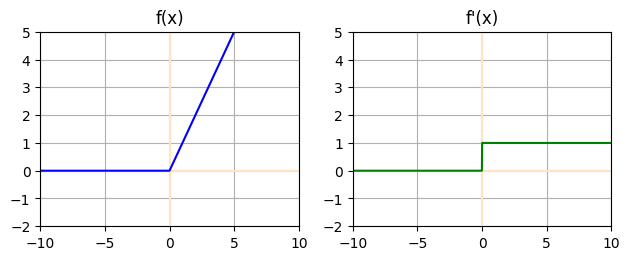

In [9]:
def draw_relu():
    f = lambda x : np.maximum(0.0, x)
    f_prime = lambda x : 1.0 if x > 0.0 else 0.0
    
    draw_charts(f, f_prime, axis = [-10, 10, -2, 5])

draw_relu()

### 3.9. ReLU6

Variante de _ReLU_ que limita la salida máxima a $6$.

- $ f(x) = min(max(0, x), 6) $

- $ f'(x) = \begin{cases} 0 & \quad \text{si } x >= 6 \\ 1 & \quad \text{si } 0 <= x < 6 \\ 0 & \quad \text{si } x < 0 \end{cases} $

Específicamente diseñada y utilizada en arquitecturas para dispositivos móviles y entornos de baja precisión, ya que es más robusta a la cuantización.

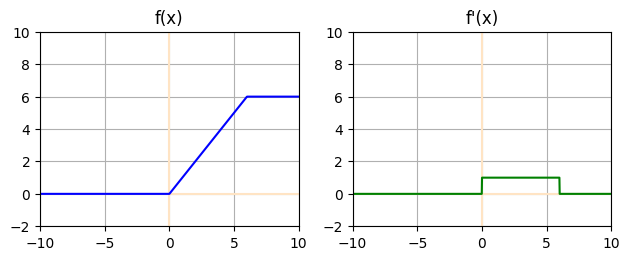

In [10]:
def draw_relu6():
    f = lambda x : np.minimum(np.maximum(0.0, x), 6.0)
    f_prime = lambda x : 0.0 if x >= 6.0 else 1.0 if x >= 0.0 else 0.0
    
    draw_charts(f, f_prime, axis = [-10, 10, -2, 10])

draw_relu6()

### 3.10. Leaky ReLU

Variante de _ReLU_ que permite un pequeño gradiente para entradas negativas, en lugar de cero.

- $ f(x) = \begin{cases} x & \quad \text{si } x \ge 0 \\ \alpha x & \quad \text{si } x < 0 \end{cases} $

- $ f'(x) = \begin{cases} 1 & \quad \text{si } x \ge 0 \\ \alpha & \quad \text{si } x < 0 \end{cases} $

Alternativa popular a _ReLU_, especialmente cuando se quiere evitar el problema de las neuronas muertas (neuronas que siempre emiten cero).

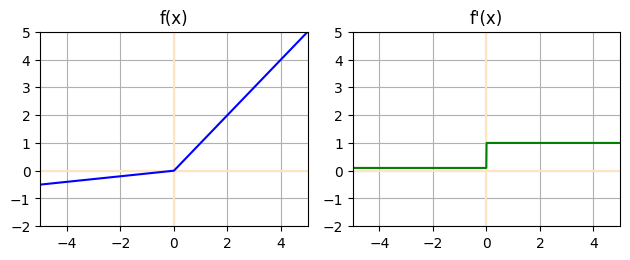

In [11]:
def draw_leaky_relu():
    f = lambda x, alpha : x if x >= 0.0 else alpha * x
    f_prime = lambda x, alpha : 1.0 if x >= 0.0 else alpha

    f_01 = lambda x : f(x, 0.1)
    f_prime_01 = lambda x: f_prime(x, 0.1)

    draw_charts(f_01, f_prime_01, axis = [-5, 5, -2, 5])

draw_leaky_relu()

### 3.11. Softplus

Versión suave y estrictamente positiva de la función _ReLU_.

- $ f(x) = \ln(1 + e^x) $

- $ f'(x) = \cfrac{1}{1 + e^{-x}} $

Utilizada habitualmente cuando se necesita una activación suave y diferenciable que sea siempre positiva.

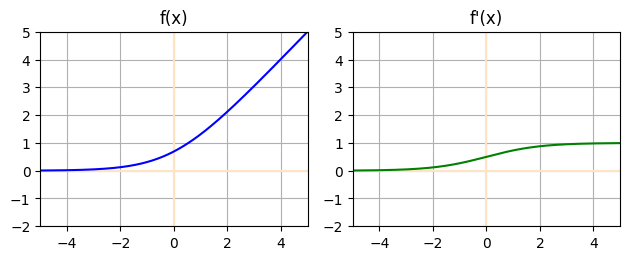

In [12]:
def draw_softplus():
    f = lambda x : np.log(1.0 + np.exp(x))
    f_prime = lambda x : 1.0 / (1.0 + np.exp(-x))

    draw_charts(f, f_prime, axis = [-5, 5, -2, 5])

draw_softplus()

### 3.12. ELU (Exponential Linear Unit)

Similar a _ReLU_ para entradas positivas, pero con una salida negativa exponencial suave para entradas negativas, lo que puede ayudar a que la media de las activaciones tienda a cero.

- $ f(x) = \begin{cases} x & \quad \text{si } x > 0 \\ \alpha (e^x-1) & \quad \text{si } x \le 0 \end{cases} $

- $ f'(x) = \begin{cases} 1 & \quad \text{si } x > 0 \\ f(x) + \alpha & \quad \text{si } x \le 0 \end{cases} $

Puede favorecer un aprendizaje más rápido y mejor generalización en algunas redes, pero es computacionalmente más costosa que _ReLU_.

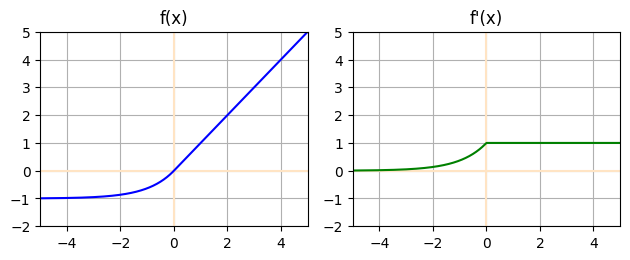

In [13]:
def draw_elu():    
    f = lambda x, alpha : x if x > 0.0 else alpha * (np.exp(x) - 1.0)
    f_prime = lambda x, alpha : 1.0 if x > 0.0 else f(x, alpha) + alpha 

    f_1 = lambda x: f(x, 1.0)
    f_prime_1 = lambda x: f_prime(x, 1.0)

    draw_charts(f_1, f_prime_1, axis = [-5, 5, -2, 5])

draw_elu()

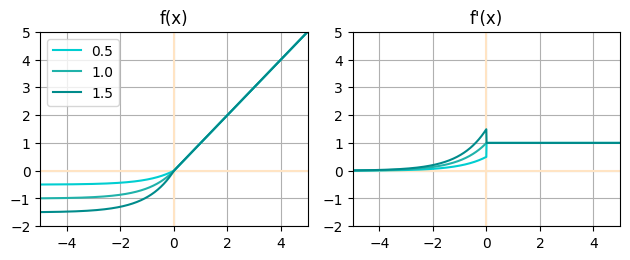

In [14]:
def draw_elu_alpha():
    f = lambda x, alpha : x if x > 0.0 else alpha * (np.exp(x) - 1.0)
    f_prime = lambda x, alpha : 1.0 if x > 0.0 else f(x, alpha) + alpha 

    fs = [{"fn": lambda x: f(x, 0.5), "color": "darkturquoise", "label": "0.5"},
          {"fn": lambda x: f(x, 1.0), "color": "lightseagreen", "label": "1.0"},
          {"fn": lambda x: f(x, 1.5), "color": "darkcyan", "label": "1.5"}]
    f_primes = [{"fn": lambda x: f_prime(x, 0.5), "color": "darkturquoise"},
                {"fn": lambda x: f_prime(x, 1.0), "color": "lightseagreen"},
                {"fn": lambda x: f_prime(x, 1.5), "color": "darkcyan"}]
    
    draw_charts(fs, f_primes, axis = [-5, 5, -2, 5])

draw_elu_alpha()

### 3.13. SELU (Scaled Exponential Linear Units)

Variante de _ELU_ con unas constantes de escalado muy concretas (_lambda_ y _alpha_) que inducen propiedades de auto-normalización en redes neuronales profundas si se inicializan los pesos correctamente.

- $ f(x) = \lambda \begin{cases} x & \text{si } x \ge 0 \\ \alpha (e^x - 1) & \text{si } x < 0 \end{cases} $

- $ f'(x) = \lambda \begin{cases} 1 & \text{si } x \ge 0 \\ \alpha e^x & \text{si } x < 0 \end{cases} $

Utilizada en arquitecturas muy específicas que buscan auto-normalización para entrenar redes muy profundas de manera estable sin necesidad de _Batch Normalization_.

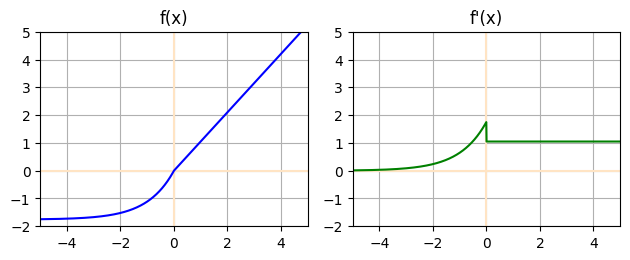

In [15]:
def draw_selu():
    scale = 1.0507009873554804934193349852946
    alpha = 1.6732632423543772848170429916717
    
    f = lambda x, scale, alpha : scale * (x if x >= 0.0 else alpha * (np.exp(x) - 1.0))
    f_prime = lambda x, scale, alpha : scale * (1.0 if x >= 0.0 else alpha * np.exp(x))

    f_1 = lambda x: f(x, scale, alpha)
    f_prime_1 = lambda x: f_prime(x, scale, alpha)

    draw_charts(f_1, f_prime_1, axis = [-5, 5, -2, 5])

draw_selu()

### 3.14. GELU (Gaussian Error Linear Units)

Pondera la entrada por su probabilidad acumulada bajo una distribución Gaussiana estándar. A diferencia de _ReLU_, es no monotónica, lo que significa que su salida no siempre aumenta a medida que aumenta la entrada. Es esa especie de "bache" en el intervalo de valores negativos próximos al cero que se observa en la gráfica. Favorece una modulación más compleja de la señal.

- $ f(x) = x P(X \le x) = x \Phi(x) $

- $ f'(x) = \Phi(x) + x \phi(x) $

Muy popular y de alto rendimiento, especialmente en modelos que implementan la arquitectura _Transformer_ para tareas de procesamiento del lenguaje natural y visión.

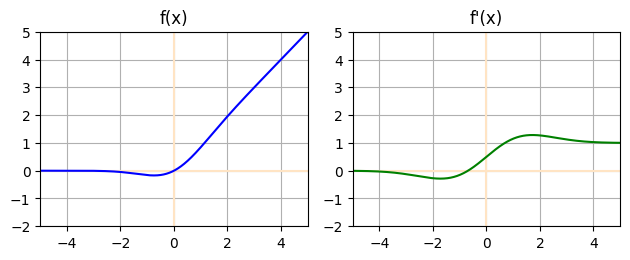

In [16]:
def draw_gelu():
    cdf = lambda x, mu, sigma : 0.5 * (1.0 + math.erf((x - mu) / (sigma * np.sqrt(2.0))))
    pdf = lambda x, mu, sigma : np.exp(-0.5 * ((x - mu)**2 / (2.0 * sigma**2))) / (sigma * np.sqrt(2.0 * np.pi))

    f = lambda x, mu, sigma : x * cdf(x, 0, 1)
    f_prime = lambda x, mu, sigma : cdf(x, 0.0, 1.0) + x * pdf(x, 0.0, 1.0)

    f_0_1 = lambda x : f(x, 0.0, 1.0)
    f_prime_0_1 = lambda x : f_prime(x, 0.0, 1.0)

    draw_charts(f_0_1, f_prime_0_1, axis = [-5, 5, -2, 5])

draw_gelu()

Función de distribución acumulativa (CDF):

- $ \Phi_{\mu, \sigma^2}(x) = \cfrac{1}{2} \begin{pmatrix} 1 + \operatorname{erf} \begin{pmatrix} \cfrac{x - \mu}{\sigma \sqrt{2}} \end{pmatrix} \end{pmatrix} $

Función de densidad de probabilidad (PDF):

- $ \phi_{\mu, \sigma^2}(x) = \cfrac{1}{\sigma \sqrt{2 \pi}} e^{-\cfrac{({x - \mu)}^2}{2 \sigma^2}} $

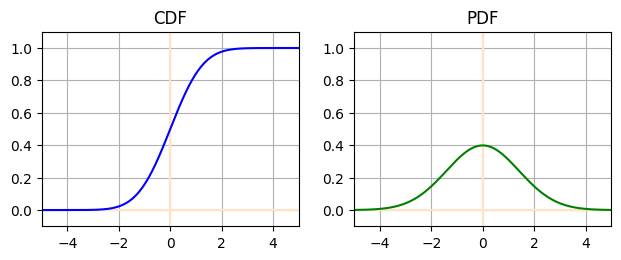

In [17]:
def draw_cdf_pdf():
    cdf = lambda x, mu, sigma : 0.5 * (1 + math.erf((x - mu) / (sigma * np.sqrt(2.0))))
    pdf = lambda x, mu, sigma : np.exp(-0.5 * ((x - mu)**2 / (2.0 * sigma**2))) / (sigma * np.sqrt(2.0 * np.pi))

    cdf_0_1 = lambda x : cdf(x, 0.0, 1.0)
    pdf_0_1 = lambda x : pdf(x, 0.0, 1.0)
    
    draw_charts(cdf_0_1, pdf_0_1, axis = [-5, 5, -0.1, 1.1], title_f = "CDF", title_f_prime = "PDF")

draw_cdf_pdf()

Implementación aproximada y computacionalmente más eficiente de la función _GELU_ utilizando _tanh_.

- $ f(x) = 0.5 x \begin{pmatrix} 1 + \tanh \begin{pmatrix} \sqrt{2 / \pi} \begin{pmatrix} x + 0.044715 x^3 \end{pmatrix} \end{pmatrix} \end{pmatrix} $

- $ f'(x) = 0.5 \tanh(0.0356774 x^3 + 0.797885 x) + (0.0535161 x^3 + 0.398942 x) \operatorname{sech}^2(0.0356774 x^3 + 0.797885 x) + 0.5 $

Comúnmente utilizada en lugar de la _GELU_ exacta por su eficiencia, manteniendo un rendimiento similar, especialmente en modelos grandes.

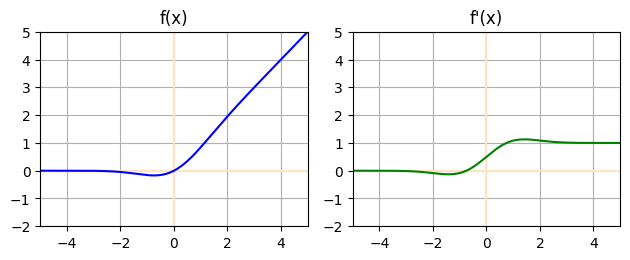

In [18]:
def draw_gelu_aprox():
    f = lambda x : 0.5 * x * (1.0 + np.tanh(np.sqrt(2.0 / np.pi) * (x + 0.044715 * x**3)))
    f_prime = lambda x : 0.5 * np.tanh(0.0356774 * x**3 + 0.797885 * x) \
        + (0.0535161 * x**3 + 0.398942 * x) * np.cosh(0.0356774 * x**3 + 0.797885 * x)**(-2) + 0.5
   
    draw_charts(f, f_prime, axis = [-5, 5, -2, 5])

draw_gelu_aprox()

### 3.15. Swish (SiLU - Sigmoid Linear Unit)

Alternativa a _GELU_, suave y no monotónica también.

- $ f(x) = x \operatorname{sigmoid}(\beta x) $

- $ f'(x) = \operatorname{sigmoid}(\beta x) + \beta x \operatorname{sigmoid}(\beta x) (1 - \operatorname{sigmoid}(\beta x)) $

Utilizada en diversas arquitecturas modernas, a menudo superando a _ReLU_ en rendimiento en redes profundas.

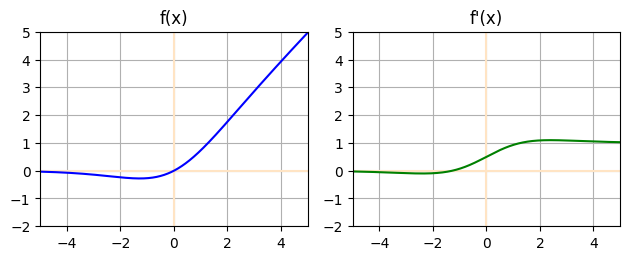

In [19]:
def draw_swish():
    sigmoid = lambda x : 1.0 / (1.0 + np.exp(-x))

    f = lambda x, beta : x * sigmoid(beta * x)
    f_prime = lambda x, beta : sigmoid(beta * x) + beta * x * sigmoid(beta * x) * (1.0 - sigmoid(beta * x))
    
    f_1 = lambda x : f(x, 1.0)
    f_prime_1 = lambda x : f_prime(x, 1.0)

    draw_charts(f_1, f_prime_1, axis = [-5, 5, -2, 5])

draw_swish()

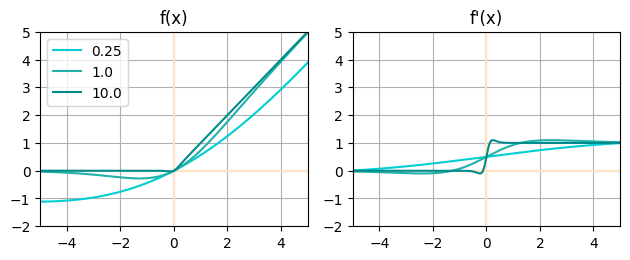

In [20]:
def draw_swish_beta():
    sigmoid = lambda x : 1.0 / (1.0 + np.exp(-x))
    
    f = lambda x, beta : x * sigmoid(beta * x)
    f_prime = lambda x, beta : sigmoid(beta * x) + beta * x * sigmoid(beta * x) * (1.0 - sigmoid(beta * x))
        
    fs = [{"fn": lambda x: f(x, 0.25), "color": "darkturquoise", "label": "0.25"},
          {"fn": lambda x: f(x, 1.0), "color": "lightseagreen", "label": "1.0"},
          {"fn": lambda x: f(x, 10.0), "color": "darkcyan", "label": "10.0"}]
    f_primes = [{"fn": lambda x: f_prime(x, 0.25), "color": "darkturquoise"},
                {"fn": lambda x: f_prime(x, 1.0), "color": "lightseagreen"},
                {"fn": lambda x: f_prime(x, 10.0), "color": "darkcyan"}]
    
    draw_charts(fs, f_primes, axis = [-5, 5, -2, 5])

draw_swish_beta()

### 3.16 Hard Swish

Aproximación lineal por tramos de la función _Swish_.

- $ f(x) = \begin{cases} x & \quad \text{si } x \ge 3 \\ 0 & \quad \text{si } x \le -3 \\ x \cfrac{(x + 3)}{6} & \quad \text{en caso contrario} \end{cases} $

- $ f'(x) = \begin{cases} 1 & \quad \text{si } x \ge 3 \\ 0 & \quad \text{si } x \le -3 \\ \cfrac{2x + 3}{6} & \quad \text{en caso contrario} \end{cases} $

Ofrece un comportamiento similar a la _Swish_ pero con un coste mucho menor. Utilizada en _hardware_ con recursos limitados o en redes neuronales binarias/cuantizadas.

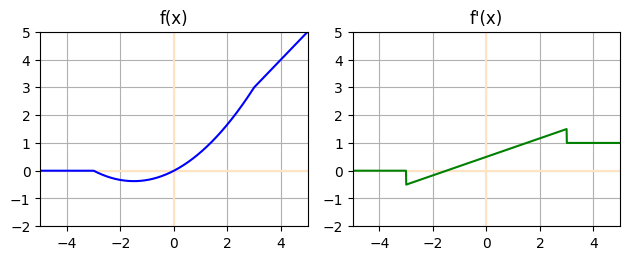

In [21]:
def draw_hard_swish():
    f = lambda x : x if x >= 3.0 else 0.0 if x <= -3.0 else x * (x + 3) / 6.0
    f_prime = lambda x : 1.0 if x >= 3.0 else 0.0 if x <= -3.0 else (2 * x + 3) / 6.0

    draw_charts(f, f_prime, axis = [-5, 5, -2, 5])

draw_hard_swish()

### 3.17. Mish

Alternativa a GELU, suave y no monotónica también.

- $ f(x) = x \tanh(\operatorname{softplus}(x)) $

- $ f'(x) = \tanh(\operatorname{softplus}(x)) + x (1 - \tanh^2(\operatorname{softplus}(x))) \operatorname{sigmoid}(x) $

Función más reciente que ha mostrado un rendimiento muy prometedor en diversas tareas y _benchmarks_.

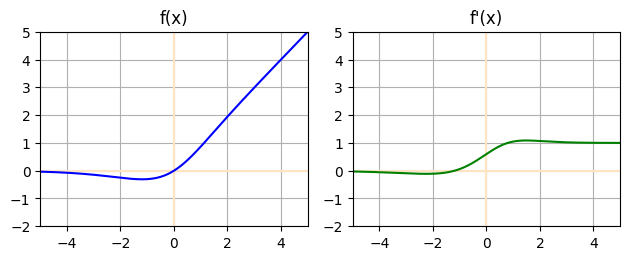

In [22]:
def draw_mish():
    sigmoid = lambda x : 1.0 / (1.0 + np.exp(-x))
    softplus = lambda x : np.log(1.0 + np.exp(x))

    f = lambda x : x * np.tanh(softplus(x))
    f_prime = lambda x : np.tanh(softplus(x)) + x * (1.0 - np.tanh(softplus(x)) ** 2) * sigmoid(x)
    
    draw_charts(f, f_prime, axis = [-5, 5, -2, 5])

draw_mish()